<a href="https://colab.research.google.com/github/mahapara2411/devopsgit/blob/main/CLV_KPI's.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the necessary liabraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import os # manipulate paths
import datetime as dt
from datetime import date # supplies classes for manipulating dates
from time import strftime # convert time to a string as specified by the format argument

import seaborn as sns # to create visualisations
import matplotlib.pyplot as plt
%matplotlib inline
import plotly
import plotly.graph_objects as go
import cufflinks as cf

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode()
cf.go_offline()

import warnings # remove warning messages
warnings.filterwarnings('ignore')

Importing the dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Retail_Dataset.xlsx to Retail_Dataset (1).xlsx


In [2]:
df = pd.read_excel("Retail_Dataset.xlsx", sheet_name = ["Year 2009-2010", "Year 2010-2011"]) #reading the excel file

In [3]:
df1 = df["Year 2009-2010"]
df2 = df["Year 2010-2011"]

In [4]:
df1.shape, df2.shape #checking for the shape of data

((525461, 8), (541910, 8))

In [5]:
data = df1.append(df2) #combing the data

In [6]:
# print the columns names for each dataset
print("data columns:",list(data))

data columns: ['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'Price', 'CustomerID', 'Country']


In [ ]:
# print the number of rows and columns
print("data shape:",data.shape)

data shape: (1067371, 8)


In [7]:
# print the basic information: missing values and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067371 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   CustomerID   824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 73.3+ MB


In [8]:
# print a summary of the data in df
data.describe()

Quantity         Price     CustomerID
count  1.067371e+06  1.067371e+06  824364.000000
mean   9.938898e+00  4.649388e+00   15324.638504
std    1.727058e+02  1.235531e+02    1697.464450
min   -8.099500e+04 -5.359436e+04   12346.000000
25%    1.000000e+00  1.250000e+00   13975.000000
50%    3.000000e+00  2.100000e+00   15255.000000
75%    1.000000e+01  4.150000e+00   16797.000000
max    8.099500e+04  3.897000e+04   18287.000000

Checking missing values for each column

In [9]:
data.isnull().sum()/data.shape[0]*100

Invoice         0.000000
StockCode       0.000000
Description     0.410541
Quantity        0.000000
InvoiceDate     0.000000
Price           0.000000
CustomerID     22.766873
Country         0.000000
dtype: float64

In [10]:
# check out the rows with missing values
# first drop the rows where the description is null
data.dropna(axis = 0, subset = ["Description"], inplace = True)

In [11]:
data.isnull().sum() #Now let's check the data before droping these customer ID's

Invoice             0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
Price               0
CustomerID     238625
Country             0
dtype: int64

In [12]:
data[data["CustomerID"].isnull()]

Invoice StockCode                     Description  Quantity  \
263     489464     21733                    85123a mixed       -96   
283     489463     71477                           short      -240   
284     489467    85123A                     21733 mixed      -192   
577     489525    85226C       BLUE PULL BACK RACING CAR         1   
578     489525     85227     SET/6 3D KIT CARDS FOR KIDS         1   
...        ...       ...                             ...       ...   
541536  581498    85099B         JUMBO BAG RED RETROSPOT         5   
541537  581498    85099C  JUMBO  BAG BAROQUE BLACK WHITE         4   
541538  581498     85150   LADIES & GENTLEMEN METAL SIGN         1   
541539  581498     85174               S/4 CACTI CANDLES         1   
541540  581498       DOT                  DOTCOM POSTAGE         1   

               InvoiceDate    Price  CustomerID         Country  
263    2009-12-01 10:52:00     0.00         NaN  United Kingdom  
283    2009-12-01 10:52:00     0.00         NaN  United Kingdom  
284    2009-12-01 10:53:00     0.00         NaN  United Kingdom  
577    2009-12-01 11:49:00     0.55         NaN  United Kingdom  
578    2009-12-01 11:49:00     0.85         NaN  United Kingdom  
...                    ...      ...         ...             ...  
541536 2011-12-09 10:26:00     4.13         NaN  United Kingdom  
541537 2011-12-09 10:26:00     4.13         NaN  United Kingdom  
541538 2011-12-09 10:26:00     4.96         NaN  United Kingdom  
541539 2011-12-09 10:26:00    10.79         NaN  United Kingdom  
541540 2011-12-09 10:26:00  1714.17         NaN  United Kingdom  

[238625 rows x 8 columns]

In [13]:
# We have to drop the rows where customer ID is null because it's a unique customer ID of each customer
# So it's better to drop rather than imputing it with some random value

data.dropna(axis = 0, subset = ["CustomerID"], inplace = True)

In [14]:
data.isnull().sum() #Now's there is no null values available in our data

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
CustomerID     0
Country        0
dtype: int64

In [15]:
df3 = data.copy()
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824364 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      824364 non-null  object        
 1   StockCode    824364 non-null  object        
 2   Description  824364 non-null  object        
 3   Quantity     824364 non-null  int64         
 4   InvoiceDate  824364 non-null  datetime64[ns]
 5   Price        824364 non-null  float64       
 6   CustomerID   824364 non-null  float64       
 7   Country      824364 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 56.6+ MB


In [16]:
df3['Quantity'][df3['Quantity']<=0] = None
df3['Quantity'].describe()

count    805620.000000
mean         13.307665
std         144.306739
min           1.000000
25%           2.000000
50%           5.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

In [18]:
df3['Price'][df3['Price']<=0] = None
df3['Price'].describe()

count    824293.000000
mean          3.677116
std          70.244404
min           0.001000
25%           1.250000
50%           1.950000
75%           3.750000
max       38970.000000
Name: Price, dtype: float64

In [19]:
df3 = df3.dropna()
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 805549 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      805549 non-null  object        
 1   StockCode    805549 non-null  object        
 2   Description  805549 non-null  object        
 3   Quantity     805549 non-null  float64       
 4   InvoiceDate  805549 non-null  datetime64[ns]
 5   Price        805549 non-null  float64       
 6   CustomerID   805549 non-null  float64       
 7   Country      805549 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 55.3+ MB


In [20]:
# print the first 5 rows
df3.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS      12.0   
1  489434    79323P                   PINK CHERRY LIGHTS      12.0   
2  489434    79323W                  WHITE CHERRY LIGHTS      12.0   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE       48.0   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX      24.0   

          InvoiceDate  Price  CustomerID         Country  
0 2009-12-01 07:45:00   6.95     13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75     13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75     13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10     13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25     13085.0  United Kingdom

**Data Cleansing**

In [21]:
# converting the type of InvoiceDate feature from string to datetime.
df3['InvoiceDate'] = pd.to_datetime(df3['InvoiceDate'])

# creating YearMonth feature to simplify reporting and visualization
df3['InvoiceYearMonth'] = df3['InvoiceDate'].map(lambda date: 100*date.year + date.month).astype('category')

df3.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS      12.0   
1  489434    79323P                   PINK CHERRY LIGHTS      12.0   
2  489434    79323W                  WHITE CHERRY LIGHTS      12.0   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE       48.0   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX      24.0   

          InvoiceDate  Price  CustomerID         Country InvoiceYearMonth  
0 2009-12-01 07:45:00   6.95     13085.0  United Kingdom           200912  
1 2009-12-01 07:45:00   6.75     13085.0  United Kingdom           200912  
2 2009-12-01 07:45:00   6.75     13085.0  United Kingdom           200912  
3 2009-12-01 07:45:00   2.10     13085.0  United Kingdom           200912  
4 2009-12-01 07:45:00   1.25     13085.0  United Kingdom           200912

**Key Performance Indicators (KPIs)**

In [23]:
# calculate Revenue for each row
df3['TotalPrice'] = df3['Price'] * df3['Quantity']

# we look at the revenue by country
sales_country = pd.DataFrame(df3.groupby('Country')['TotalPrice'].agg(sum).sort_values(ascending=False)).reset_index()

# plot a bar chart
plot_data = [go.Bar(x=sales_country['Country'],y=sales_country['TotalPrice'])]

plot_layout = go.Layout(title='Sales by Country')

fig = go.Figure(data=plot_data, layout=plot_layout)
fig.show(renderer="colab")

How many orders made by the customers?

In [24]:
df3.groupby(by=['CustomerID','Country'], as_index=False)['Invoice'].count().head()

CustomerID         Country  Invoice
0     12346.0  United Kingdom       34
1     12347.0         Iceland      253
2     12348.0         Finland       51
3     12349.0           Italy      175
4     12350.0          Norway       17

Checking TOP 5 highest money spent¶


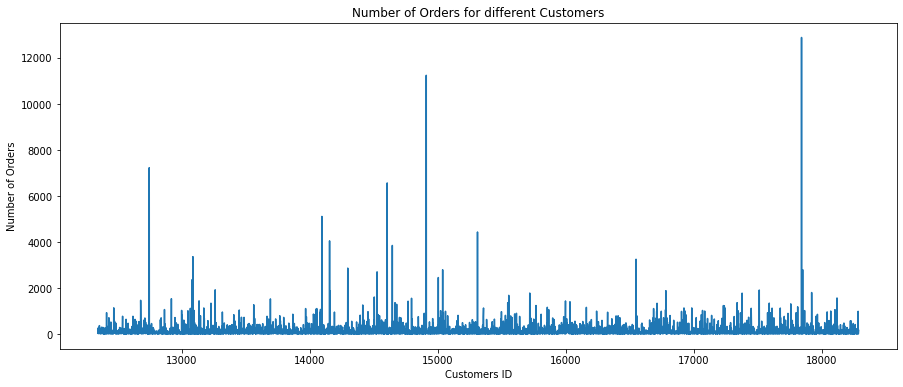

In [25]:
orders = df3.groupby(by=['CustomerID','Country'], as_index=False)['Invoice'].count()

plt.subplots(figsize=(15,6))
plt.plot(orders.CustomerID, orders.Invoice)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

Checking TOP 5 most number of orders

In [26]:
print('The TOP 5 customers with most number of orders...')
orders.sort_values(by='Invoice', ascending=False).head()

The TOP 5 customers with most number of orders...


CustomerID         Country  Invoice
5446     17841.0  United Kingdom    12890
2551     14911.0            EIRE    11245
413      12748.0  United Kingdom     7228
2250     14606.0  United Kingdom     6566
1744     14096.0  United Kingdom     5111

How much money spent by the customers?¶


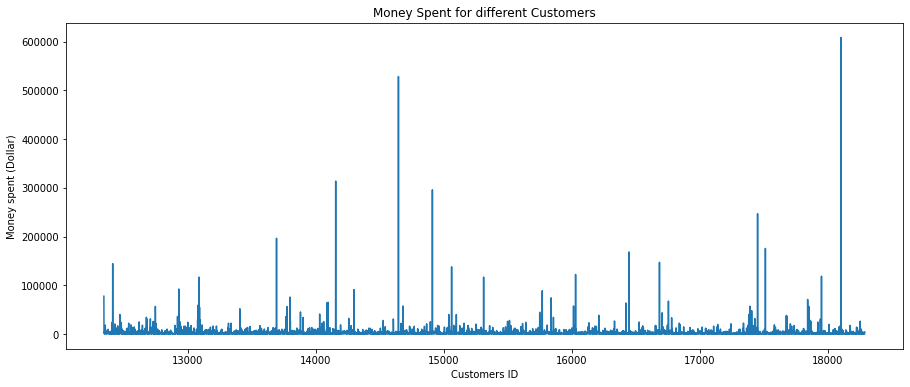

In [27]:
money_spent = df3.groupby(by=['CustomerID','Country'], as_index=False)['TotalPrice'].sum()

plt.subplots(figsize=(15,6))
plt.plot(money_spent.CustomerID, money_spent.TotalPrice)
plt.xlabel('Customers ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent for different Customers')
plt.show()

Checking TOP 5 highest money spent


In [28]:
print('The TOP 5 customers with highest money spent...')
money_spent.sort_values(by='TotalPrice', ascending=False).head()

The TOP 5 customers with highest money spent...


CustomerID         Country  TotalPrice
5705     18102.0  United Kingdom   608821.65
2290     14646.0     Netherlands   528602.52
1802     14156.0            EIRE   313946.37
2551     14911.0            EIRE   295972.63
5063     17450.0  United Kingdom   246973.09

In [31]:
# creating a new dataframe with UK customers only
data_uk = df3.query("Country=='United Kingdom'").reset_index(drop=True)
data_uk.shape

(725250, 10)

**Monthly Revenue**

In [32]:
# create a new dataframe with YearMonth and TotalPrice columns
sales = data_uk.groupby(['InvoiceYearMonth'])['TotalPrice'].sum().reset_index()
sales.head()

InvoiceYearMonth  TotalPrice
0           200912  613214.900
1           201001  416635.242
2           201002  411077.936
3           201003  589725.011
4           201004  503425.741

In [33]:
# line chart showing the monthly sales
plot_data = [go.Scatter(x=sales['InvoiceYearMonth'],y=sales['TotalPrice'],marker_color='royalblue')]

plot_layout = go.Layout(xaxis={"type": "category"},title='Monthly sales')

fig = go.Figure(data=plot_data, layout=plot_layout)
fig.show(renderer="colab")

In [34]:
# calculate the monthly growth
sales['MonthlyGrowth'] = sales['TotalPrice'].pct_change()

sales.head()

InvoiceYearMonth  TotalPrice  MonthlyGrowth
0           200912  613214.900            NaN
1           201001  416635.242      -0.320572
2           201002  411077.936      -0.013339
3           201003  589725.011       0.434582
4           201004  503425.741      -0.146338

In [35]:
# bar chart showing the monthly growth rate
sales['positive'] = sales['MonthlyGrowth'] > 0
plot_data = [go.Bar(x=sales.query("InvoiceYearMonth < 201112")['InvoiceYearMonth'],
                    y=round(sales.query("InvoiceYearMonth < 201112")['MonthlyGrowth']*100,2),
                    marker_color=sales.positive.map({True: 'darkgreen', False: 'brown'}))]

plot_layout = go.Layout(xaxis={"type": "category"},title='Monthly Growth Rate')

fig = go.Figure(data=plot_data, layout=plot_layout)
fig.show(renderer="colab")

**Monthly Active Customers**

In [36]:
# creating monthly active customers dataframe by counting unique Customer IDs
monthly_active = data_uk.groupby('InvoiceYearMonth')['CustomerID'].nunique().reset_index()
monthly_active.columns = ['InvoiceYearMonth','ActiveCustomers']

# print the dataframe
monthly_active

InvoiceYearMonth  ActiveCustomers
0            200912              904
1            201001              663
2            201002              713
3            201003              984
4            201004              876
5            201005              901
6            201006              968
7            201007              856
8            201008              849
9            201009             1048
10           201010             1379
11           201011             1486
12           201012              815
13           201101              647
14           201102              679
15           201103              880
16           201104              784
17           201105              962
18           201106              889
19           201107              859
20           201108              834
21           201109             1146
22           201110             1230
23           201111             1505
24           201112              560

In [37]:
# bar chart showing monthly active customers
plot_data = [go.Bar(x=monthly_active.query("InvoiceYearMonth < 201112")['InvoiceYearMonth'],
                    y=monthly_active.query("InvoiceYearMonth < 201112")['ActiveCustomers'],
                    marker_color='royalblue')]

plot_layout = go.Layout(xaxis={"type": "category"},title='Monthly Active Customers')

active_customers = go.Figure(data=plot_data, layout=plot_layout)
active_customers.show(renderer="colab")


# calculate the monthly active customers rate: ACR
monthly_active['ActiveCustomersRate'] = monthly_active['ActiveCustomers'].pct_change()

# bar chart showing the monthly active customers rate
monthly_active['positive'] = monthly_active['ActiveCustomersRate'] > 0
plot_data = [go.Bar(x=monthly_active.query("InvoiceYearMonth < 201112")['InvoiceYearMonth'],
                    y=round(monthly_active.query("InvoiceYearMonth < 201112")['ActiveCustomersRate']*100,2),
                    marker_color=monthly_active.positive.map({True: 'darkgreen', False: 'brown'}))]

plot_layout = go.Layout(xaxis={"type": "category"},title='Monthly Active Customers Rate')

active_customers_rate = go.Figure(data=plot_data, layout=plot_layout)
active_customers_rate.show(renderer="colab")

**Monthly Order Count**

In [38]:
# create a new dataframe for number of orders by using InvoiceNo feature
monthly_orders = data_uk.groupby('InvoiceYearMonth')['Invoice'].nunique().reset_index()
monthly_orders.columns = ['InvoiceYearMonth','Orders']

# print the dataframe
monthly_orders

InvoiceYearMonth  Orders
0            200912    1429
1            201001     906
2            201002    1001
3            201003    1396
4            201004    1222
5            201005    1270
6            201006    1377
7            201007    1272
8            201008    1193
9            201009    1515
10           201010    1941
11           201011    2373
12           201012    1291
13           201101     874
14           201102     896
15           201103    1177
16           201104    1058
17           201105    1403
18           201106    1249
19           201107    1200
20           201108    1133
21           201109    1568
22           201110    1705
23           201111    2386
24           201112     706

In [39]:
# plot showing monthly orders
plot_data = [go.Scatter(x=monthly_orders.query("InvoiceYearMonth < 201112")['InvoiceYearMonth'],
                        y=monthly_orders.query("InvoiceYearMonth < 201112")['Orders'],
                        marker_color='royalblue')]

plot_layout = go.Layout(xaxis={"type": "category"},title='Monthly Orders')

orders = go.Figure(data=plot_data, layout=plot_layout)
orders.show(renderer="colab")


# calculate the monthly orders rate
monthly_orders['OrdersRate'] = monthly_orders['Orders'].pct_change()

# bar chart showing the monthly orders rate
monthly_orders['positive'] = monthly_orders['OrdersRate'] > 0
plot_data = [go.Bar(x=monthly_orders.query("InvoiceYearMonth < 201112")['InvoiceYearMonth'],
                    y=round(monthly_orders.query("InvoiceYearMonth < 201112")['OrdersRate']*100,2),
                    marker_color=monthly_orders.positive.map({True: 'darkgreen', False: 'brown'}))]

plot_layout = go.Layout(xaxis={"type": "category"},title='Monthly Orders Rate')

orders_rate = go.Figure(data=plot_data, layout=plot_layout)
orders_rate.show(renderer="colab")

**Average Order Value**

In [40]:
# create a new dataframe for average average order value
monthly_aov = data_uk.groupby(['InvoiceYearMonth','Invoice'])['TotalPrice'].sum().reset_index() # group TotalPrice by invoice to get the order value 
monthly_aov = monthly_aov.groupby('InvoiceYearMonth')['TotalPrice'].mean().reset_index() # calculate the average order value
monthly_aov.columns = ['InvoiceYearMonth','AOV']

#print the dataframe
monthly_aov

InvoiceYearMonth        AOV
0            200912  18.282547
1            201001  12.421670
2            201002  12.255983
3            201003  17.582213
4            201004  15.009265
5            201005  15.010975
6            201006  16.140182
7            201007  15.033539
8            201008  15.160195
9            201009  20.320973
10           201010  26.212380
11           201011  29.327603
12           201012  23.175148
13           201101  13.183568
14           201102  10.603608
15           201103  13.929179
16           201104  12.210702
17           201105  16.444615
18           201106  15.649965
19           201107  14.478169
20           201108  14.861015
21           201109  23.755412
22           201110  24.589792
23           201111  29.237225
24           201112  14.083783

In [41]:
# plot showing monthly orders

plot_data = [go.Scatter(x=monthly_aov.query("InvoiceYearMonth < 201112")['InvoiceYearMonth'],
                        y=round(monthly_aov.query("InvoiceYearMonth < 201112")['AOV'],2),
                        marker_color='royalblue')]

plot_layout = go.Layout(xaxis={"type": "category"},title='Monthly AOV')

aov = go.Figure(data=plot_data, layout=plot_layout)
aov.show(renderer="colab")


# calculate the monthly orders rate
monthly_aov['AOVRate'] = monthly_aov['AOV'].pct_change()

# bar chart showing the monthly orders rate
monthly_aov['positive'] = monthly_aov['AOVRate'] > 0
plot_data = [go.Bar(x=monthly_aov.query("InvoiceYearMonth < 201112")['InvoiceYearMonth'],
                    y=round(monthly_aov.query("InvoiceYearMonth < 201112")['AOVRate']*100,2),
                    marker_color=monthly_aov.positive.map({True: 'darkgreen', False: 'brown'}))]

plot_layout = go.Layout(xaxis={"type": "category"},title='Monthly AOV Rate')

aov_rate = go.Figure(data=plot_data, layout=plot_layout)
aov_rate.show(renderer="colab")

In [42]:
# create a dataframe contaning CustomerID and first purchase date
first_order = data_uk.groupby('CustomerID').InvoiceDate.min().reset_index()
first_order.columns = ['CustomerID','FirstOrder']
first_order['FirstOrder'] = first_order['FirstOrder'].map(lambda date: 100*date.year + date.month)

# merge first purchase date column to our main dataframe (df_uk)
data_uk = pd.merge(data_uk, first_order, on='CustomerID')

#create a column called UserType
data_uk['UserType'] = 'New'
data_uk.loc[data_uk.InvoiceYearMonth != data_uk.FirstOrder,"UserType"] = 'Existing'

data_uk.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS      12.0   
1  489434    79323P                   PINK CHERRY LIGHTS      12.0   
2  489434    79323W                  WHITE CHERRY LIGHTS      12.0   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE       48.0   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX      24.0   

          InvoiceDate  Price  CustomerID         Country InvoiceYearMonth  \
0 2009-12-01 07:45:00   6.95     13085.0  United Kingdom           200912   
1 2009-12-01 07:45:00   6.75     13085.0  United Kingdom           200912   
2 2009-12-01 07:45:00   6.75     13085.0  United Kingdom           200912   
3 2009-12-01 07:45:00   2.10     13085.0  United Kingdom           200912   
4 2009-12-01 07:45:00   1.25     13085.0  United Kingdom           200912   

   TotalPrice  FirstOrder UserType  
0        83.4      200912      New  
1        81.0      200912      New  
2        81.0      200912      New  
3       100.8      200912      New  
4        30.0      200912      New

In [43]:
# create a dataframe to show the new customer ratio
new_customer_ratio = data_uk.query("UserType == 'New'").groupby(['InvoiceYearMonth'])['CustomerID'].nunique()/data_uk.query("UserType == 'Existing' or UserType == 'New'").groupby(['InvoiceYearMonth'])['CustomerID'].nunique()
new_customer_ratio = new_customer_ratio.reset_index()
new_customer_ratio = new_customer_ratio.dropna()

new_customer_ratio.columns = ['InvoiceYearMonth','NewCustomerRatio']
# print the dafaframe
new_customer_ratio

# plot showing monthly new customer ratio
plot_data = [go.Bar(x=new_customer_ratio.query("InvoiceYearMonth != 201112 and InvoiceYearMonth != 200912")['InvoiceYearMonth'],
                    y=round(new_customer_ratio.query("InvoiceYearMonth != 201112 and InvoiceYearMonth != 200912")['NewCustomerRatio'],2),
                    marker_color='royalblue')]
plot_layout = go.Layout(xaxis={"type": "category"},title='Monthly New Customer Ratio')

ratio = go.Figure(data=plot_data, layout=plot_layout)
ratio.show(renderer="colab")

**New Customer vs Existing Customer Revenue**

In [44]:
#calculate the revenue per month for each user type
customer_type_revenue = data_uk.groupby(['InvoiceYearMonth','UserType'])['TotalPrice'].sum().reset_index()

# plot showing monthly new customers vs Existing customers
plot_data = [go.Bar(x=customer_type_revenue.query("InvoiceYearMonth != 201112 and InvoiceYearMonth != 200912 and UserType=='New'")['InvoiceYearMonth'],
                    y=round(customer_type_revenue.query("InvoiceYearMonth != 201112 and InvoiceYearMonth != 200912 and UserType=='New'")['TotalPrice'],2),
                    name='New',
                    marker_color='royalblue'),
            go.Bar(x=customer_type_revenue.query("InvoiceYearMonth != 201112 and InvoiceYearMonth != 200912 and UserType=='Existing'")['InvoiceYearMonth'],
                    y=round(customer_type_revenue.query("InvoiceYearMonth != 201112 and InvoiceYearMonth != 200912 and UserType=='Existing'")['TotalPrice'],2),
                    name='Existing',
                    marker_color='slategrey')]

plot_layout = go.Layout(xaxis={"type": "category"},title='Monthly New vs Existing Customer Revenue')

avg = go.Figure(data=plot_data, layout=plot_layout)
avg.show(renderer="colab")

In [45]:
def get_month(x) : return dt.datetime(x.year,x.month,1)
data_uk['InvoiceYearMonth'] = data_uk['InvoiceDate'].apply(get_month)
grouping = data_uk.groupby('CustomerID')['InvoiceYearMonth']
data_uk['CohortMonth'] = grouping.transform('min')
data_uk.tail()

Invoice StockCode                          Description  Quantity  \
725245  581241     22674        FRENCH TOILET SIGN BLUE METAL      12.0   
725246  581241     21770               OPEN CLOSED METAL SIGN       2.0   
725247  581241     22670            FRENCH WC SIGN BLUE METAL      12.0   
725248  581385    84029G  KNITTED UNION FLAG HOT WATER BOTTLE      24.0   
725249  581385     21479        WHITE SKULL HOT WATER BOTTLE       72.0   

               InvoiceDate  Price  CustomerID         Country  \
725245 2011-12-08 10:58:00   1.25     15520.0  United Kingdom   
725246 2011-12-08 10:58:00   4.95     15520.0  United Kingdom   
725247 2011-12-08 10:58:00   1.25     15520.0  United Kingdom   
725248 2011-12-08 13:11:00   3.75     13298.0  United Kingdom   
725249 2011-12-08 13:11:00   3.75     13298.0  United Kingdom   

       InvoiceYearMonth  TotalPrice  FirstOrder UserType CohortMonth  
725245       2011-12-01        15.0      201112      New  2011-12-01  
725246       2011-12-01         9.9      201112      New  2011-12-01  
725247       2011-12-01        15.0      201112      New  2011-12-01  
725248       2011-12-01        90.0      201112      New  2011-12-01  
725249       2011-12-01       270.0      201112      New  2011-12-01

In [46]:
def get_month_int (dframe,column):
    year = dframe[column].dt.year
    month = dframe[column].dt.month
    day = dframe[column].dt.day
    return year, month , day 

invoice_year,invoice_month,_ = get_month_int(data_uk,'InvoiceYearMonth')
cohort_year,cohort_month,_ = get_month_int(data_uk,'CohortMonth')

year_diff = invoice_year - cohort_year 
month_diff = invoice_month - cohort_month 

data_uk['CohortIndex'] = year_diff * 12 + month_diff + 1

In [47]:
#Count monthly active customers from each cohort
grouping = data_uk.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)
# Return number of unique elements in the object.
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth',columns='CohortIndex',values='CustomerID')
cohort_counts

CohortIndex     1      2      3      4      5      6      7      8      9   \
CohortMonth                                                                  
2009-12-01   904.0  318.0  298.0  382.0  342.0  323.0  336.0  311.0  304.0   
2010-01-01   345.0   72.0  110.0  108.0   90.0  110.0   87.0   80.0   95.0   
2010-02-01   343.0   80.0   76.0  104.0   83.0   71.0   63.0   98.0   88.0   
2010-03-01   412.0   81.0   98.0  102.0   97.0   87.0  104.0  126.0  116.0   
2010-04-01   269.0   52.0   55.0   45.0   51.0   59.0   74.0   70.0   27.0   
2010-05-01   234.0   36.0   40.0   42.0   42.0   59.0   52.0   30.0   14.0   
2010-06-01   246.0   42.0   48.0   51.0   56.0   71.0   32.0   19.0   20.0   
2010-07-01   163.0   25.0   28.0   49.0   46.0   22.0   15.0   21.0   20.0   
2010-08-01   149.0   31.0   44.0   45.0   25.0   18.0   12.0   18.0   19.0   
2010-09-01   220.0   53.0   51.0   28.0   20.0   23.0   32.0   21.0   28.0   
2010-10-01   339.0   84.0   50.0   37.0   28.0   26.0   45.0   46.0   35.0   
2010-11-01   305.0   54.0   26.0   28.0   22.0   27.0   42.0   32.0   28.0   
2010-12-01    64.0    5.0    3.0    5.0    6.0    5.0    3.0    5.0    4.0   
2011-01-01    62.0   11.0   14.0   14.0   15.0   10.0    9.0    7.0    8.0   
2011-02-01   109.0   17.0   18.0   19.0   27.0   18.0   17.0   16.0   17.0   
2011-03-01   164.0   30.0   37.0   33.0   34.0   25.0   32.0   31.0   39.0   
2011-04-01    93.0   23.0   16.0   19.0   17.0   22.0   16.0   25.0   10.0   
2011-05-01    97.0   22.0   22.0   17.0   21.0   19.0   25.0   11.0    NaN   
2011-06-01    94.0   23.0   17.0   24.0   19.0   24.0    8.0    NaN    NaN   
2011-07-01    90.0   19.0   28.0   26.0   32.0   14.0    NaN    NaN    NaN   
2011-08-01    86.0   26.0   25.0   22.0   14.0    NaN    NaN    NaN    NaN   
2011-09-01   170.0   44.0   64.0   26.0    NaN    NaN    NaN    NaN    NaN   
2011-10-01   195.0   64.0   30.0    NaN    NaN    NaN    NaN    NaN    NaN   
2011-11-01   176.0   26.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2011-12-01    21.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

CohortIndex     10  ...     16     17     18     19     20     21     22  \
CohortMonth         ...                                                    
2009-12-01   320.0  ...  263.0  236.0  270.0  247.0  226.0  226.0  278.0   
2010-01-01   112.0  ...   53.0   82.0   70.0   64.0   68.0   88.0   68.0   
2010-02-01    94.0  ...   66.0   52.0   59.0   47.0   80.0   78.0   50.0   
2010-03-01    45.0  ...   69.0   75.0   64.0   72.0   84.0   87.0   34.0   
2010-04-01    25.0  ...   42.0   36.0   43.0   46.0   59.0   16.0    NaN   
2010-05-01    15.0  ...   27.0   31.0   40.0   33.0   12.0    NaN    NaN   
2010-06-01    29.0  ...   25.0   31.0   50.0   13.0    NaN    NaN    NaN   
2010-07-01    19.0  ...   28.0   38.0   13.0    NaN    NaN    NaN    NaN   
2010-08-01    20.0  ...   28.0    9.0    NaN    NaN    NaN    NaN    NaN   
2010-09-01    29.0  ...   12.0    NaN    NaN    NaN    NaN    NaN    NaN   
2010-10-01    32.0  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2010-11-01    28.0  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2010-12-01     2.0  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2011-01-01    13.0  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2011-02-01    19.0  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2011-03-01    16.0  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2011-04-01     NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2011-05-01     NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2011-06-01     NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2011-07-01     NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2011-08-01     NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2011-09-01     NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2011-10-01     NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    

In [48]:
# Retention table
cohort_size = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_size,axis=0) #axis=0 to ensure the divide along the row axis 
retention.round(3) * 100 #to show the number as percentage

CohortIndex     1     2     3     4     5     6     7     8     9     10  ...  \
CohortMonth                                                               ...   
2009-12-01   100.0  35.2  33.0  42.3  37.8  35.7  37.2  34.4  33.6  35.4  ...   
2010-01-01   100.0  20.9  31.9  31.3  26.1  31.9  25.2  23.2  27.5  32.5  ...   
2010-02-01   100.0  23.3  22.2  30.3  24.2  20.7  18.4  28.6  25.7  27.4  ...   
2010-03-01   100.0  19.7  23.8  24.8  23.5  21.1  25.2  30.6  28.2  10.9  ...   
2010-04-01   100.0  19.3  20.4  16.7  19.0  21.9  27.5  26.0  10.0   9.3  ...   
2010-05-01   100.0  15.4  17.1  17.9  17.9  25.2  22.2  12.8   6.0   6.4  ...   
2010-06-01   100.0  17.1  19.5  20.7  22.8  28.9  13.0   7.7   8.1  11.8  ...   
2010-07-01   100.0  15.3  17.2  30.1  28.2  13.5   9.2  12.9  12.3  11.7  ...   
2010-08-01   100.0  20.8  29.5  30.2  16.8  12.1   8.1  12.1  12.8  13.4  ...   
2010-09-01   100.0  24.1  23.2  12.7   9.1  10.5  14.5   9.5  12.7  13.2  ...   
2010-10-01   100.0  24.8  14.7  10.9   8.3   7.7  13.3  13.6  10.3   9.4  ...   
2010-11-01   100.0  17.7   8.5   9.2   7.2   8.9  13.8  10.5   9.2   9.2  ...   
2010-12-01   100.0   7.8   4.7   7.8   9.4   7.8   4.7   7.8   6.2   3.1  ...   
2011-01-01   100.0  17.7  22.6  22.6  24.2  16.1  14.5  11.3  12.9  21.0  ...   
2011-02-01   100.0  15.6  16.5  17.4  24.8  16.5  15.6  14.7  15.6  17.4  ...   
2011-03-01   100.0  18.3  22.6  20.1  20.7  15.2  19.5  18.9  23.8   9.8  ...   
2011-04-01   100.0  24.7  17.2  20.4  18.3  23.7  17.2  26.9  10.8   NaN  ...   
2011-05-01   100.0  22.7  22.7  17.5  21.6  19.6  25.8  11.3   NaN   NaN  ...   
2011-06-01   100.0  24.5  18.1  25.5  20.2  25.5   8.5   NaN   NaN   NaN  ...   
2011-07-01   100.0  21.1  31.1  28.9  35.6  15.6   NaN   NaN   NaN   NaN  ...   
2011-08-01   100.0  30.2  29.1  25.6  16.3   NaN   NaN   NaN   NaN   NaN  ...   
2011-09-01   100.0  25.9  37.6  15.3   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2011-10-01   100.0  32.8  15.4   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2011-11-01   100.0  14.8   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2011-12-01   100.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

CohortIndex    16    17    18    19    20    21    22    23    24    25  
CohortMonth                                                              
2009-12-01   29.1  26.1  29.9  27.3  25.0  25.0  30.8  29.8  40.3  19.5  
2010-01-01   15.4  23.8  20.3  18.6  19.7  25.5  19.7  24.3   6.1   NaN  
2010-02-01   19.2  15.2  17.2  13.7  23.3  22.7  14.6   5.8   NaN   NaN  
2010-03-01   16.7  18.2  15.5  17.5  20.4  21.1   8.3   NaN   NaN   NaN  
2010-04-01   15.6  13.4  16.0  17.1  21.9   5.9   NaN   NaN   NaN   NaN  
2010-05-01   11.5  13.2  17.1  14.1   5.1   NaN   NaN   NaN   NaN   NaN  
2010-06-01   10.2  12.6  20.3   5.3   NaN   NaN   NaN   NaN   NaN   NaN  
2010-07-01   17.2  23.3   8.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2010-08-01   18.8   6.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2010-09-01    5.5   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2010-10-01    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2010-11-01    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2010-12-01    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2011-01-01    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2011-02-01    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2011-03-01    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2011-04-01    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2011-05-01    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2011-06-01    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2011-07-01    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2011-08-01    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2011-09-01    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2011-10-01    NaN   NaN   NaN   NaN 

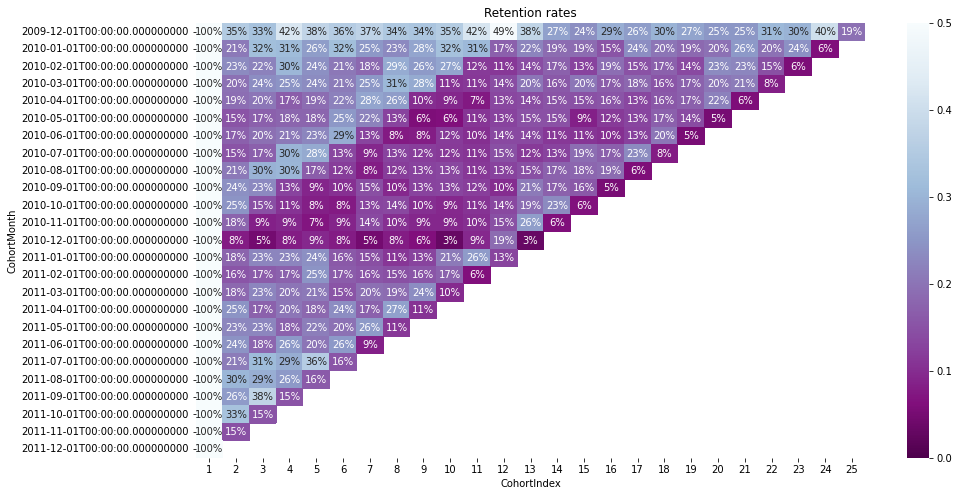

In [49]:
#Build the heatmap
plt.figure(figsize=(15, 8))
plt.title('Retention rates')
sns.heatmap(data=retention,annot = True,fmt = '.0%',vmin = 0.0,vmax = 0.5,cmap="BuPu_r")
plt.show()

In [50]:
# identify which customers are active by looking at their revenue per month
customer_purchase = data_uk.groupby(['CustomerID','InvoiceYearMonth'])['TotalPrice'].sum().dropna().reset_index()
customer_purchase['CustomerID'] = customer_purchase['CustomerID'].astype(int).astype('category')
customer_purchase

# change customer_purchase from long to wide dataframe
df_retention = pd.crosstab(customer_purchase['CustomerID'], customer_purchase['InvoiceYearMonth'].astype(str), dropna=False).reset_index()
df_retention.head()

InvoiceYearMonth CustomerID  2009-12-01  2010-01-01  2010-02-01  2010-03-01  \
0                     12346           1           1           0           1   
1                     12608           0           0           0           0   
2                     12745           0           0           0           0   
3                     12746           0           0           0           0   
4                     12747           1           0           1           1   

InvoiceYearMonth  2010-04-01  2010-05-01  2010-06-01  2010-07-01  2010-08-01  \
0                          0           0           1           0           0   
1                          0           0           0           0           0   
2                          0           1           0           0           1   
3                          0           0           1           0           0   
4                          1           1           1           0           1   

InvoiceYearMonth  ...  2011-03-01  2011-04-01  2011-05-01  2011-06-01  \
0                 ...           0           0           0           0   
1                 ...           0           0           0           0   
2                 ...           0           0           0           0   
3                 ...           0           0           0           0   
4                 ...           1           0           1           1   

InvoiceYearMonth  2011-07-01  2011-08-01  2011-09-01  2011-10-01  2011-11-01  \
0                          0           0           0           0           0   
1                          0           0           0           0           0   
2                          0           0           0           0           0   
3                          0           0           0           0           0   
4                          0           1           0           1           1   

InvoiceYearMonth  2011-12-01  
0                          0  
1                          0  
2                          0  
3                          0  
4                          1  

[5 rows x 26 columns]

In [51]:
# count of total customers each months
total_customers = {}

for column in df_retention.loc[:, df_retention.columns != 'CustomerID'].columns:
    # count the total number of customers for each months
    TotalCustomers = df_retention[column].sum()
    # store the results
    total_customers[column] = (TotalCustomers)

# create a data frame
total_customers = pd.DataFrame(total_customers.items(), columns=['InvoiceYearMonth', 'TotalCustomers'])
total_customers 

InvoiceYearMonth  TotalCustomers
0        2009-12-01             904
1        2010-01-01             663
2        2010-02-01             713
3        2010-03-01             984
4        2010-04-01             876
5        2010-05-01             901
6        2010-06-01             968
7        2010-07-01             856
8        2010-08-01             849
9        2010-09-01            1048
10       2010-10-01            1379
11       2010-11-01            1486
12       2010-12-01             815
13       2011-01-01             647
14       2011-02-01             679
15       2011-03-01             880
16       2011-04-01             784
17       2011-05-01             962
18       2011-06-01             889
19       2011-07-01             859
20       2011-08-01             834
21       2011-09-01            1146
22       2011-10-01            1230
23       2011-11-01            1505
24       2011-12-01             560

In [52]:
# count of total returning customers each months
returning_customers = {}

for i in range(0,12,1):
    # count the total number of returning customers for each months
    columns_selection = df_retention.iloc[:, (1+i):(3+i)]
    ReturningCustomers = np.where((columns_selection.iloc[:, 0] == 1) & (columns_selection.iloc[:, 1] == 1), 1, 0)
    # store the results
    returning_customers[i] = (ReturningCustomers.sum())
    
    
# create a data frame
returning_customers = pd.DataFrame(returning_customers.items(), columns=['index', 'ReturningCustomers']).drop(['index'], axis=1)
# create a row to account for the month of December 2010
new_row = pd.DataFrame({'ReturningCustomers': [np.nan]})
# add the new row to retention dataframe 
returning_customers = pd.concat([new_row, returning_customers]).reset_index(drop = True) 
returning_customers

ReturningCustomers
0                  NaN
1                318.0
2                242.0
3                288.0
4                357.0
5                325.0
6                346.0
7                369.0
8                331.0
9                343.0
10               426.0
11               606.0
12               486.0

In [53]:
# add the total number of customers ech month to the retention dataframe
retention = pd.merge(total_customers, returning_customers, left_index=True, right_index=True)

# calculate the retention rate
retention['RetentionRate'] = retention['ReturningCustomers']/retention['TotalCustomers']

retention

InvoiceYearMonth  TotalCustomers  ReturningCustomers  RetentionRate
0        2009-12-01             904                 NaN            NaN
1        2010-01-01             663               318.0       0.479638
2        2010-02-01             713               242.0       0.339411
3        2010-03-01             984               288.0       0.292683
4        2010-04-01             876               357.0       0.407534
5        2010-05-01             901               325.0       0.360710
6        2010-06-01             968               346.0       0.357438
7        2010-07-01             856               369.0       0.431075
8        2010-08-01             849               331.0       0.389870
9        2010-09-01            1048               343.0       0.327290
10       2010-10-01            1379               426.0       0.308920
11       2010-11-01            1486               606.0       0.407806
12       2010-12-01             815               486.0       0.596319

In [54]:
# plot showing monthly retention rate
plot_data = [go.Scatter(x=retention.query("InvoiceYearMonth != '201112' and InvoiceYearMonth != '200912'")['InvoiceYearMonth'],
                        y=round(retention.query("InvoiceYearMonth != '201112' and InvoiceYearMonth != '200912'")['RetentionRate'],2),
                        marker_color='royalblue')]

plot_layout = go.Layout(xaxis={"type": "category"},title='Monthly Retention Rate')

customer_retention = go.Figure(data=plot_data, layout=plot_layout)
customer_retention.show(renderer="colab")

**Retention by cohort**

In [55]:
# define the cohort_period function
def cohort_period(df):
    """
    Creates a `CohortPeriod` column, which is the Nth period based on the cutsomer's first order.
    
    Example
    -------
    Get the 3rd month for every customer:
        df.sort(['CustomerID', 'InvoiceNo', inplace=True)
        df = df.groupby('CustomerID').apply(cohort_period)
        df[df.CohortPeriod == 3]
    """
    df['CohortPeriod'] = np.arange(len(df)) + 1
    return df

In [56]:
# creating a new dataframe grouped by FirstOrder and InvoiceYearMonth 
df_cohort = data_uk.groupby(['FirstOrder','InvoiceYearMonth'])

# count the unique customerID
df_cohort = df_cohort.agg({'CustomerID': pd.Series.nunique})

# make the column name more meaningful
df_cohort.rename(columns={'CustomerID': 'Nb_Customers'}, inplace=True)

# apply the cohort_period() function to df_cohort
df_cohort = df_cohort.groupby(level=0).apply(cohort_period)
df_cohort.head

<bound method NDFrame.head of                              Nb_Customers  CohortPeriod
FirstOrder InvoiceYearMonth                            
200912     2009-12-01                 904             1
           2010-01-01                 318             2
           2010-02-01                 298             3
           2010-03-01                 382             4
           2010-04-01                 342             5
...                                   ...           ...
201110     2011-11-01                  64             2
           2011-12-01                  30             3
201111     2011-11-01                 176             1
           2011-12-01                  26             2
201112     2011-12-01                  21             1

[325 rows x 2 columns]>

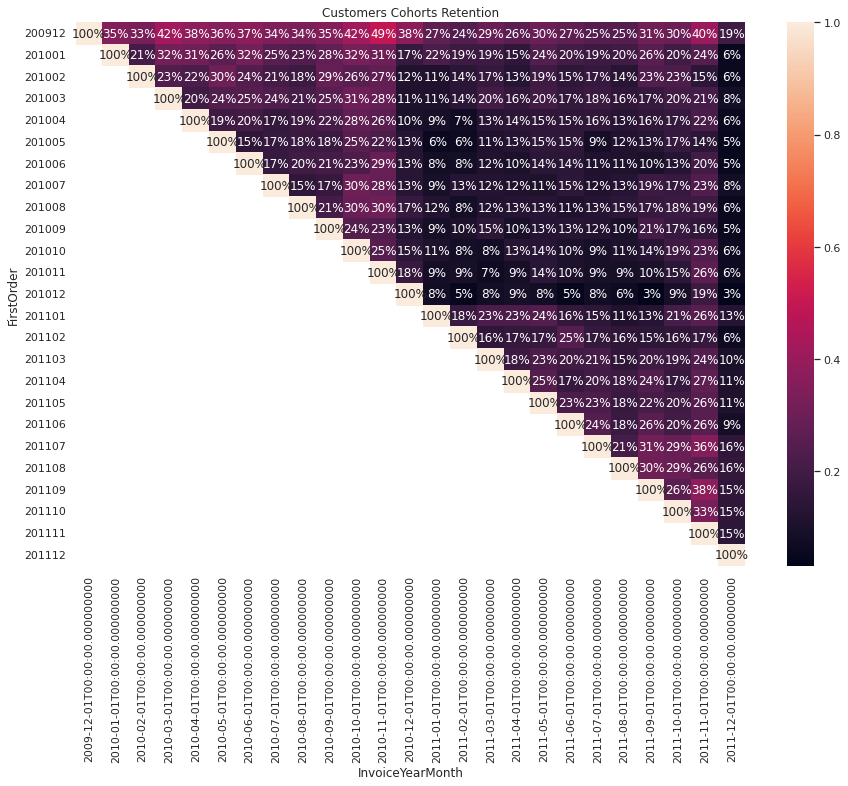

In [57]:
# create cohort based retention table
cohorts = df_cohort['Nb_Customers'].unstack(0)

# create a serie holding the total number of customers for each CohortGroup
cohort_group_size = df_cohort['Nb_Customers'].groupby(level=0).first()

# create a new dataframe containing the percentage of customers from the cohort purchasing within the given period
cohort_retention = df_cohort['Nb_Customers'].unstack(0).divide(cohort_group_size, axis=1)

# plot showing cohort retention rate
sns.set(style='white')
plt.figure(figsize=(15, 10))
plt.title('Customers Cohorts Retention')
sns.heatmap(cohort_retention.T, mask=cohort_retention.T.isnull(), annot=True, fmt='.0%')

**Average quantity for each cohort**

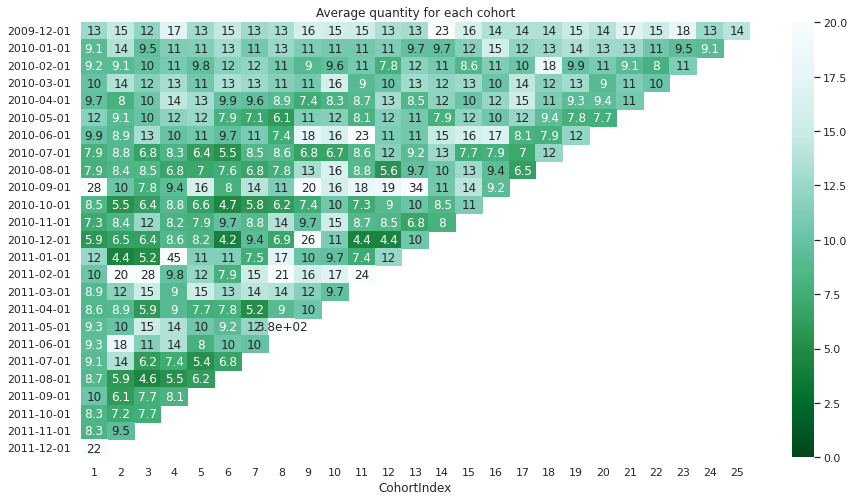

In [58]:
#Average quantity for each cohort
grouping = data_uk.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['Quantity'].mean()
cohort_data = cohort_data.reset_index()
average_quantity = cohort_data.pivot(index='CohortMonth',columns='CohortIndex',values='Quantity')
average_quantity.round(1)
average_quantity.index = average_quantity.index.date

#Build the heatmap
plt.figure(figsize=(15, 8))
plt.title('Average quantity for each cohort')
sns.heatmap(data=average_quantity,annot = True,vmin = 0.0,vmax =20,cmap="BuGn_r")
plt.show()